# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [3]:
!pip install -q torch_geometric
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [4]:
# from torch_geometric.explain import Explanation

# Loading the importance of nodes and edges of our network 
the contain sum of 5 age groups importance both nodes and edges
and length signifies the number of samples they contain in each age group
* age group0: 0-20years
* age group 1 :20-40years
* age group-2 : 40-60years
* age group-3 :60-80 years
* age group-4:80+years


In [5]:
# edge=np.load('/kaggle/input/explanation-of-threshold-75-fold3/kaggle/working/age_group_sum_edge.npy')
# node=np.load('/kaggle/input/explanation-of-threshold-75-fold3/kaggle/working/age_group_sum_node.npy')
# length=np.load('/kaggle/input/explanation-of-threshold-75-fold3/kaggle/working/length_of_each_age_grp.npy')

In [6]:
edge=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/data (1)/age_group_sum_edge.npy')
node=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/data (1)/age_group_sum_node.npy')
length=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/data (1)/length_of_each_age_grp.npy')

## averaging the importance of each age group

In [7]:
node_importance=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/data (1)/node_importance.npy')
y_age=np.load('/kaggle/input/explanation-of-threshold-75-fold3/kaggle/working/ytest.npy')

# Node attributes importance 

In [8]:
node_attr_importance=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/data (1)/node_attr_importance.npy')


In [9]:
y_age.shape,node_importance.shape

((756,), (756, 20318))

# Linear regression to find the temporal behavior of node i.e. CpG site importance

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming y_age and node_importance are numpy arrays
# y_age is a 1D array of shape (n_samples,)
# node_importance is a 2D array of shape (n_features, n_samples)

# Number of samples (this should be the length of y_age)
explanation_sample = node_importance.shape[0]
numb_col = node_importance.shape[1]
# List to store the slopes
age_importance_corr = []

# Iterate over each sample
for i in range(numb_col):
    # Reshape y_age to be a 2D array of shape (n_samples, 1) for linear regression
    y_age_reshaped = y_age[:explanation_sample].reshape(-1, 1)
#     print(y_age_reshaped.shape)
    # Get the i-th column from node_importance and reshape to (n_samples, 1)
    node_importance_column = node_importance[:, i].reshape(-1, 1)
    
    # Perform linear regression
    reg = LinearRegression().fit(node_importance_column, y_age_reshaped)
#     print(reg)
    # Get the slope (coefficient of the node_importance_column)
    slope = reg.coef_[0][0]
    
    # Append the slope to the list
    age_importance_corr.append(slope)


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming y_age and node_importance are numpy arrays
# y_age is a 1D array of shape (n_samples,)
# node_importance is a 2D array of shape (n_features, n_samples)

# Number of samples (this should be the length of y_age)
explanation_sample = node_attr_importance.shape[0]
numb_col = node_importance.shape[1]
# List to store the slopes
age_attr_importance_corr = []

# Iterate over each sample
for i in range(numb_col):
    # Reshape y_age to be a 2D array of shape (n_samples, 1) for linear regression
    y_age_reshaped = y_age[:explanation_sample].reshape(-1, 1)
#     print(y_age_reshaped.shape)
    # Get the i-th column from node_importance and reshape to (n_samples, 1)
    node_importance_column = node_importance[:, i].reshape(-1, 1)
    
    # Perform linear regression
    reg = LinearRegression().fit(node_importance_column, y_age_reshaped)
#     print(reg)
    # Get the slope (coefficient of the node_importance_column)
    slope = reg.coef_[0][0]
    
    # Append the slope to the list
    age_attr_importance_corr.append(slope)


In [12]:
length.sum()

756.0

# Name of all node attributes

In [13]:
attrs=['methylation','CPG_ISLAND',
 'CPG_ISLAND_LEN',
 'Dist_to_TSS',
 'Next_Base_A',
 'Next_Base_C',
 'Next_Base_T',
 'start_position',
 'end_position',
 'avg_position']

# Mean node attribute importance

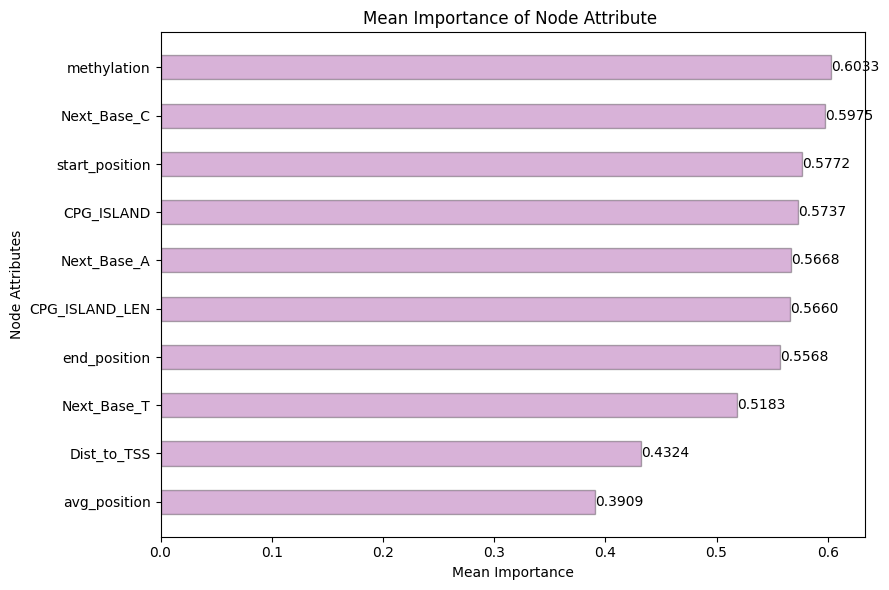

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming node_attr_importance is already defined
# Example placeholder data for node_attr_importance
# node_attr_importance = np.random.rand(100, 10)

# Attributes corresponding to the columns of node_attr_importance
attrs = ['methylation', 'CPG_ISLAND', 'CPG_ISLAND_LEN', 'Dist_to_TSS', 
         'Next_Base_A', 'Next_Base_C', 'Next_Base_T', 'start_position', 
         'end_position', 'avg_position']

# Calculate the mean for each attribute along axis 0
means = np.mean(node_attr_importance, axis=0)

# Sort the means in descending order and get the sorted indices
sorted_indices = np.argsort(means)

# Sort the means and attributes according to the sorted indices
sorted_means = means[sorted_indices]
sorted_attrs = [attrs[i] for i in sorted_indices]

# Plot the horizontal histogram
fig, ax = plt.subplots(figsize=(9, 6))

# Create the horizontal bar plot
bars = ax.barh(sorted_attrs, sorted_means,alpha=0.3,height=.5,color='purple', edgecolor='black')

# Set the labels for the axes
ax.set_xlabel('Mean Importance')
ax.set_ylabel('Node Attributes')

# Set the title of the plot
ax.set_title('Mean Importance of Node Attribute ')

# Add the value labels beside the bars
for bar in bars:
    # The x position is the right edge of the bar
    x_val = bar.get_width()
    # The y position is the center of the bar
    y_val = bar.get_y() + bar.get_height() / 2
    # Format the label with 2 decimal places
    label = f'{x_val:.4f}'
    # Add text just to the right of the bar
    ax.text(x_val, y_val, label, va='center', ha='left', color='black', fontsize=10)

# Ensure everything fits without overlapping
plt.tight_layout()
plt.savefig('Mean importance of node attributes.png')
# Display the plot
plt.show()


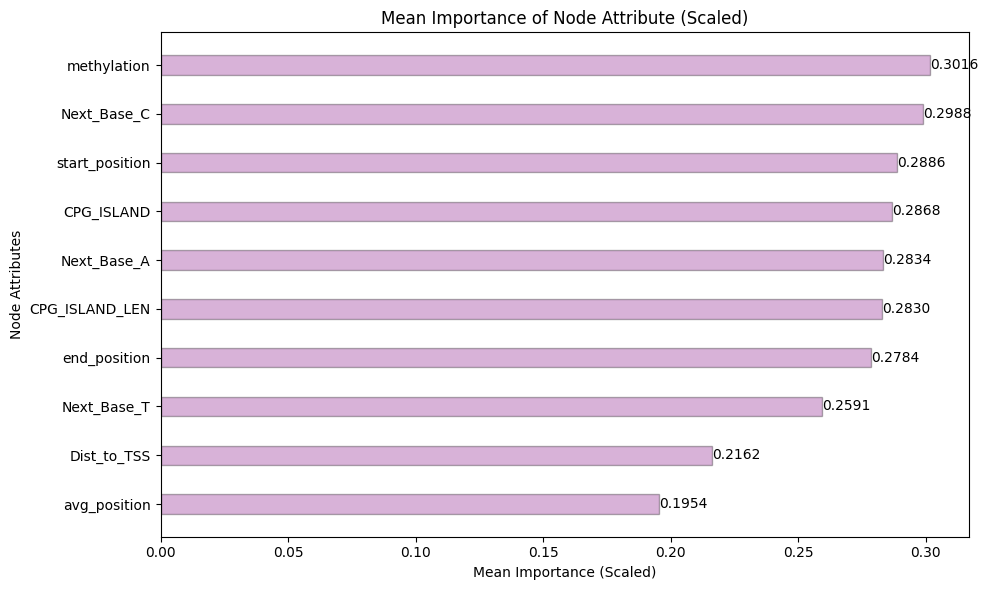

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming node_attr_importance is already defined
# Example placeholder data for node_attr_importance
# node_attr_importance = np.random.rand(100, 10)

# Attributes corresponding to the columns of node_attr_importance
attrs = ['methylation', 'CPG_ISLAND', 'CPG_ISLAND_LEN', 'Dist_to_TSS', 
         'Next_Base_A', 'Next_Base_C', 'Next_Base_T', 'start_position', 
         'end_position', 'avg_position']

# Calculate the mean for each attribute along axis 0
means = np.mean(node_attr_importance, axis=0)

# Sort the means in descending order and get the sorted indices
sorted_indices = np.argsort(means)

# Sort the means and attributes according to the sorted indices
sorted_means = means[sorted_indices]
sorted_attrs = [attrs[i] for i in sorted_indices]

# Apply a scaling factor to reduce the length of the bars
scaling_factor = 0.5  # Adjust this value to change the bar lengths
scaled_means = sorted_means * scaling_factor

# Plot the horizontal histogram
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar height to a smaller value
bar_height = 0.4  # Adjust the height for better spacing

# Create the horizontal bar plot with the scaled values
bars = ax.barh(sorted_attrs, scaled_means, height=bar_height, alpha=0.3, color='purple', edgecolor='black')

# Set the labels for the axes
ax.set_xlabel('Mean Importance (Scaled)')
ax.set_ylabel('Node Attributes')

# Set the title of the plot
ax.set_title('Mean Importance of Node Attribute (Scaled)')

# Add the value labels beside the bars
for bar in bars:
    # The x position is the right edge of the bar
    x_val = bar.get_width()
    # The y position is the center of the bar
    y_val = bar.get_y() + bar.get_height() / 2
    # Format the label with 4 decimal places
    label = f'{x_val:.4f}'
    # Add text just to the right of the bar
    ax.text(x_val, y_val, label, va='center', ha='left', color='black', fontsize=10)

# Ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


# Temporal analysis of the node attributes as we age

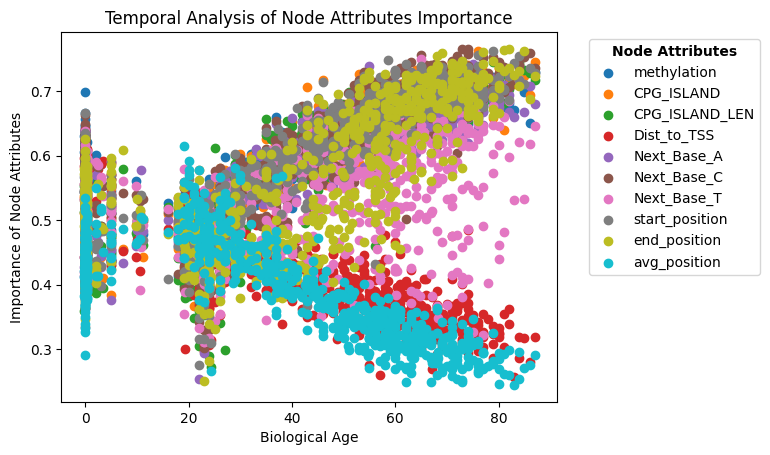

In [16]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, node_attr_importance, and b

# Create a figure and axis
fig, ax = plt.subplots()

# Your existing code to create the scatter plot
for i in range(10):
    ax.scatter(y_age, node_attr_importance[:, i], label=attrs[i])

# Specify the location of the legend outside the plot
# Specify the location of the legend outside the plot and add a title to it
#  Add the legend with a title
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Node Attributes')

# Make the legend title bold
plt.setp(legend.get_title(), fontweight='bold')
# Set labels for the axes
ax.set_xlabel('Biological Age')
ax.set_ylabel('Importance of Node Attributes')

# Set the title of the plot
ax.set_title('Temporal Analysis of Node Attributes Importance')
# Save the entire figure
fig.savefig('Temporal analysis of node attributes importance.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


In [17]:
avg_node=node/length.reshape(8, -1)
avg_edge=edge/length.reshape(8, -1)

In [18]:
avg_node

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00651841, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Edge attributes

In [19]:
cur_index=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/edge_index (1).npy')
edge_attr=np.load('/kaggle/input/explanation-of-threshold-0-7-fold-2/edge_attr (1).npy')

In [20]:
edge_data=pd.DataFrame(edge_attr,columns=['comethylation','sameChr','sameGene'])

In [21]:
edge_attr.shape,cur_index.shape

((4558878, 3), (2, 4558878))

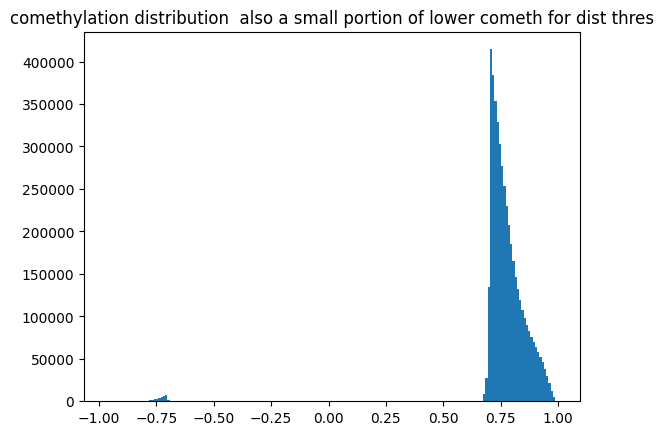

In [22]:
plt.hist(edge_data.comethylation,bins=200)
plt.title('comethylation distribution  also a small portion of lower cometh for dist thres')
plt.show()

In [23]:
edge_data['src']=cur_index[0]
edge_data['dst']=cur_index[1]
edge_data

,comethylation,sameChr,sameGene,src,dst
0,0.781274,0.0,0.0,0,4
1,0.709163,0.0,0.0,0,28
2,0.799524,0.0,0.0,0,46
3,0.702216,0.0,0.0,0,112
4,0.757843,0.0,0.0,0,125
...,...,...,...,...,...
4558873,0.699960,1.0,0.0,20317,16199
4558874,0.711353,0.0,0.0,20317,18213
4558875,0.744301,0.0,0.0,20317,19288
4558876,0.715972,0.0,0.0,20317,19507


In [24]:
# edge_data=pd.read_csv('/kaggle/input/edge-attr-and-index-new/data (1).csv')

# We take all the common CpG names that are present in all formats

In [25]:
Common_cpgs = np.array(pd.read_pickle('/kaggle/input/graph-age/example_dependencies/multi_platform_cpgs.pkl'))
Common_cpgs=Common_cpgs.tolist()

# Information contains all the relevant information about a CpG sites

In [26]:
import pandas as pd
import numpy as np


In [27]:
file_path = "/kaggle/input/cpgsite-info/GPL8490_HumanMethylation27_270596_v.1.2.csv"

# Read the compressed CSV file into a pandas DataFrame
information = pd.read_csv(file_path,skiprows=7,low_memory=False)

# Now you can work with the DataFrame 'df'
# For example, you can print the first few rows
information.dropna(subset=['Chr'],inplace=True)
information[["start","end"]]=information.CPG_ISLAND_LOCATIONS.fillna("0:0-0").str.split(':').str[1].str.split('-', expand=True).astype(int)
# information.set_index("IlmnID",inplace=True)
information['CPG_ISLAND'] = information['CPG_ISLAND'].astype(int)
# Assuming 'information' is your DataFrame and 'Common_cpgs' is your list of IDs
information = information[information.IlmnID.isin(Common_cpgs)].reset_index(drop=True)

In [28]:
information[information.CPG_ISLAND==0][['MapInfo','start','end']]

,MapInfo,start,end
7,8797926.0,0,0
10,20710839.0,0,0
12,6627518.0,0,0
21,19871299.0,0,0
22,7394101.0,0,0
...,...,...,...
20297,56203473.0,0,0
20299,73728631.0,0,0
20304,37926280.0,0,0
20305,30184548.0,0,0


# To determine if a CpG site is hypomethylated or hypermethylated with age 

In [29]:
# To load correlations back from the file
correlations = np.genfromtxt('/kaggle/input/correlation-of-cpg-with-age/cpg_wise_correlations.csv', delimiter=',')

In [30]:
information['Hypo_or_Hyper']=correlations

In [31]:
information['age_imp_corr']=age_importance_corr

In [32]:
upward_cpgs=information.sort_values(by=['age_imp_corr'],ascending=False).iloc[:10,:].index.values
downward_cpgs=information.sort_values(by=['age_imp_corr'],ascending=True).iloc[:10,:].index.values

In [33]:
# information.index

In [34]:
node_importance.shape

(756, 20318)

In [35]:
information['cpg_imp']=np.mean(node_importance,axis=0)

In [36]:
no_change_cpg=information[(information.age_imp_corr>0)].sort_values(by=['age_imp_corr'],ascending=True).iloc[:10,:].index.values.tolist()

In [37]:
no_change_cpg

[1273, 6834, 11528, 17704, 11668, 14313, 7398, 588, 2879, 6714]

In [38]:
# no_change_cpg=information[(information.age_imp_corr<0)].sort_values(by=['age_imp_corr'],ascending=False).iloc[2:7,:].index.values.tolist()

In [39]:
cpg=information.IlmnID.tolist()
genes=information.Symbol.tolist()

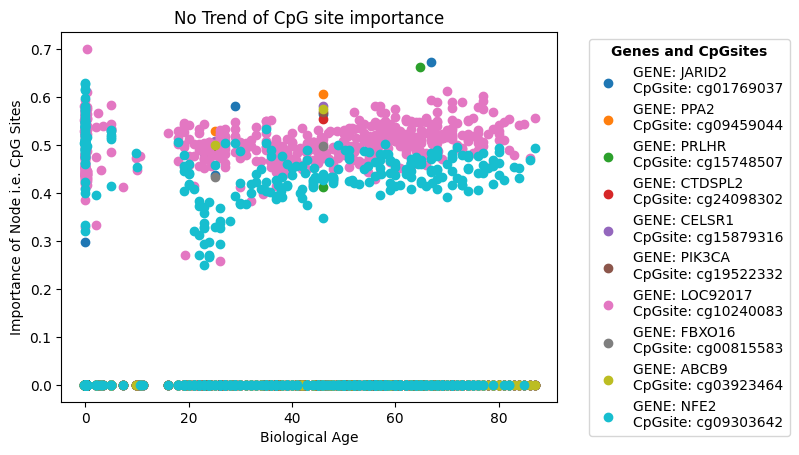

In [40]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, node_attr_importance, and b

# Create a figure and axis
fig, ax = plt.subplots()

# Your existing code to create the scatter plot
for i in no_change_cpg:
    ax.scatter(y_age,node_importance[:,i], label='GENE: '+genes[i]+'\n'+'CpGsite: '+cpg[i])

legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genes and CpGsites')
ax.set_xlabel('Biological Age')
ax.set_ylabel('Importance of Node i.e. CpG Sites')
# Make the legend title bold
plt.setp(legend.get_title(), fontweight='bold')
plt.title('No Trend of CpG site importance')
# Save the entire figure
fig.savefig('No Trend of CpG site importance.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


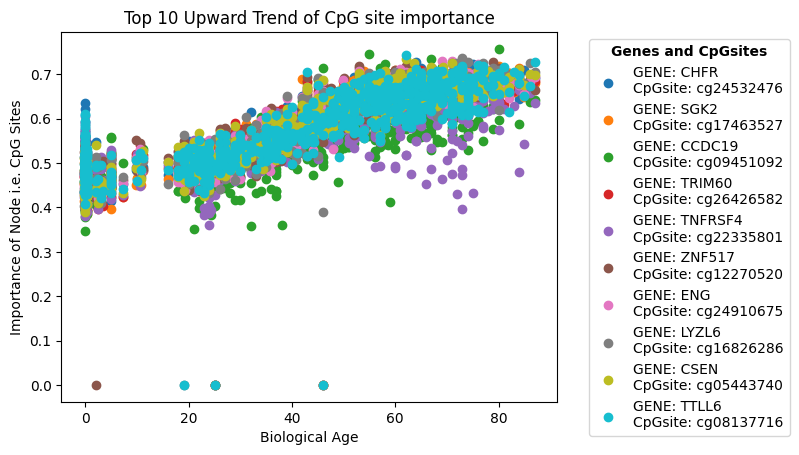

In [41]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, node_attr_importance, and b

# Create a figure and axis
fig, ax = plt.subplots()

# Your existing code to create the scatter plot
for i in upward_cpgs:
    ax.scatter(y_age,node_importance[:,i], label='GENE: '+genes[i]+'\n'+'CpGsite: '+cpg[i])

legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genes and CpGsites')

ax.set_xlabel('Biological Age')
ax.set_ylabel('Importance of Node i.e. CpG Sites')
# Make the legend title bold
plt.setp(legend.get_title(), fontweight='bold')
plt.title('Top 10 Upward Trend of CpG site importance')
# Save the entire figure
fig.savefig('Upward Trend of CpG site importance.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


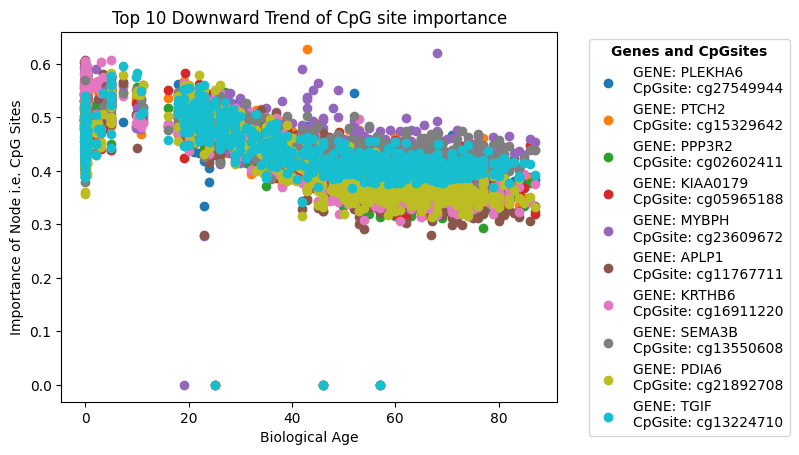

In [42]:
import matplotlib.pyplot as plt

# Assuming you have already defined y_test, node_attr_importance, and b

# Create a figure and axis
fig, ax = plt.subplots()

# Your existing code to create the scatter plot
for i in downward_cpgs:
    ax.scatter(y_age,node_importance[:,i], label='GENE: '+genes[i]+'\n'+'CpGsite: '+cpg[i])

legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Genes and CpGsites')

ax.set_xlabel('Biological Age')
ax.set_ylabel('Importance of Node i.e. CpG Sites')

# Make the legend title bold
plt.setp(legend.get_title(), fontweight='bold')
plt.title('Top 10 Downward Trend of CpG site importance')
# Save the entire figure
fig.savefig('Downward Trend of CpG site importance.png', bbox_inches='tight')

# Show the plot (optional)
plt.show()


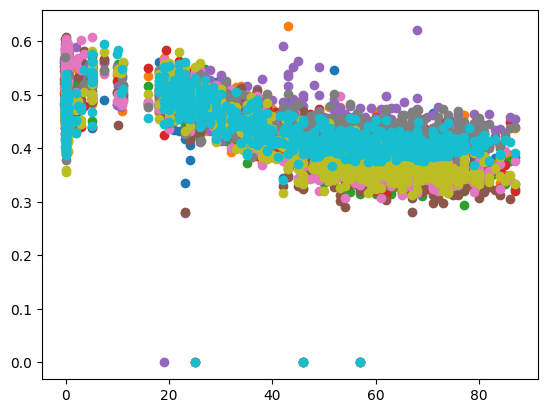

In [43]:
for i in downward_cpgs:
    plt.scatter(y_age,node_importance[:,i])

## Helper function to find if it is hypomethylation or hypermethylation

In [44]:
def hypo_or_hyper(x):
#     print(x)
    if x>0:
        return 'hyper'
    else:
        return 'hypo'

# Age group

# Labels

In [45]:
information

,IlmnID,Name,IlmnStrand,AddressA_ID,AlleleA_ProbeSeq,AddressB_ID,AlleleB_ProbeSeq,GenomeBuild,Chr,MapInfo,...,CPG_ISLAND_LOCATIONS,MIR_CPG_ISLAND,MIR_NAMES,Unnamed: 33,Unnamed: 34,start,end,Hypo_or_Hyper,age_imp_corr,cpg_imp
0,cg00000292,cg00000292,TOP,990370,AAACATTAATTACCAACCACTCTTCCAAAAAACACTTACCATTAAA...,6660678.0,AAACATTAATTACCAACCGCTCTTCCAAAAAACACTTACCATTAAA...,36.0,16,28797601.0,...,16:28797486-28797825,NaN,NaN,NaN,NaN,28797486,28797825,0.099869,0.000000,0.000000
1,cg00002426,cg00002426,TOP,6580397,AATATAATAACATTACCTTACCCATCTTATAATCAAACCAAACAAA...,6100343.0,AATATAATAACATTACCTTACCCGTCTTATAATCAAACCAAACGAA...,36.0,3,57718583.0,...,3:57716811-57718675,NaN,NaN,NaN,NaN,57716811,57718675,0.230254,-8.182236,0.001376
2,cg00003994,cg00003994,TOP,7150184,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,7150392.0,AATAATAATAATACCCCCTATAATACTAACTAACAAACATACCCTC...,36.0,7,15692387.0,...,7:15691512-15693551,NaN,NaN,NaN,NaN,15691512,15693551,0.194257,0.000000,0.000000
3,cg00007981,cg00007981,TOP,5260689,CCAAATTCAAAAAACTACAACTAAAACTAACTATAAACAAAATAAT...,6860356.0,CCAAATTCAAAAAACTACGACTAAAACTAACTATAAACAAAATAAT...,36.0,11,93502242.0,...,11:93501124-93502564,NaN,NaN,NaN,NaN,93501124,93502564,-0.165324,22.288342,0.000583
4,cg00008493,cg00008493,TOP,7200647,CTATCTACCACAATAAATTAAAACCCAACCATCATAATAAACAAAA...,2900438.0,CTATCTACCGCGATAAATTAAAACCCAACCATCATAATAAACGAAA...,36.0,14,92883530.0,...,14:92883203-92883973,NaN,NaN,NaN,NaN,92883203,92883973,0.207902,-41.949741,0.001263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20313,cg27655905,cg27655905,TOP,6420040,CAATTAAATCAACATACTAAACAACCACACAAAAACTACTAAATAA...,5420040.0,CGATTAAATCAACATACTAAACAACCACACGAAAACTACTAAATAA...,36.0,11,67795364.0,...,11:67795190-67795415,NaN,NaN,NaN,NaN,67795190,67795415,0.173923,0.000000,0.000000
20314,cg27657283,cg27657283,TOP,510452,AAACCAAAAATTCCTCTAACTACAACTTAAATACCCATAATCTTCC...,7510537.0,AAACCAAAAATTCCTCTAACTACAACTTAAATACCCATAATCTTCC...,36.0,1,43006110.0,...,1:43004664-43006120,NaN,NaN,NaN,NaN,43004664,43006120,-0.033757,0.000000,0.000000
20315,cg27662379,cg27662379,BOT,60167,CACTAAACAACCATTCATTAAACAAAAACTAATAACACAAAATAAC...,4570626.0,CACTAAACAACCGTTCATTAAACAAAAACTAATAACACAAAATAAC...,36.0,3,129852443.0,...,3:129851499-129852999,NaN,NaN,NaN,NaN,129851499,129852999,-0.268312,0.000000,0.000000
20316,cg27662877,cg27662877,TOP,2120673,ACCTATACAAAATCCAATCTTATAAAAACAACAAACTAAACAACAA...,3180717.0,ACCTATACAAAATCCAATCTTATAAAAACGACGAACTAAACAACGA...,36.0,18,70110575.0,...,18:70108996-70110872,NaN,NaN,NaN,NaN,70108996,70110872,-0.126529,44.679165,0.000587


In [46]:
# gene_edge_filtered=edge_data[edge_data.edge_importance>=.1]

In [47]:
information.columns

Index(['IlmnID', 'Name', 'IlmnStrand', 'AddressA_ID', 'AlleleA_ProbeSeq',
       'AddressB_ID', 'AlleleB_ProbeSeq', 'GenomeBuild', 'Chr', 'MapInfo',
       'Ploidy', 'Species', 'Source', 'SourceVersion', 'SourceStrand',
       'SourceSeq', 'TopGenomicSeq', 'Next_Base', 'Color_Channel',
       'TSS_Coordinate', 'Gene_Strand', 'Gene_ID', 'Symbol', 'Synonym',
       'Accession', 'GID', 'Annotation', 'Product', 'Distance_to_TSS',
       'CPG_ISLAND', 'CPG_ISLAND_LOCATIONS', 'MIR_CPG_ISLAND', 'MIR_NAMES',
       'Unnamed: 33', 'Unnamed: 34', 'start', 'end', 'Hypo_or_Hyper',
       'age_imp_corr', 'cpg_imp'],
      dtype='object')

In [48]:
information[information.IlmnID=='cg11299964'].Symbol

8176    MAPKAP1
Name: Symbol, dtype: object

In [49]:

import copy
import pandas as pd

def gene_indices(gene_names, filtered_information, filtered_edge_data,threshold_importance=.5):
    # Step 1: Find desired node indices
    
    desired_nodes_index=[]
    for gene_name in gene_names:
        desired_nodes_index+= filtered_information[filtered_information.fillna('unknown').Symbol.str.contains(gene_name)].index.tolist()
    nodes=copy.deepcopy(desired_nodes_index)
    print(len(nodes))
    print(filtered_information.loc[nodes].Symbol)
    # Step 2: Perform DFS to find all connected nodes
    def dfs(start_node, visited, edge_data):
        stack = [start_node]
        while stack:
            current = stack.pop()
            if current not in visited:
                visited.add(current)
                # Find all edges where current node is either src or dst
                neighbors = edge_data[(edge_data['src'] == current) | (edge_data['dst'] == current)]
                for _, row in neighbors.iterrows():
                    neighbor = row['dst'] if row['src'] == current else row['src']
                    if neighbor not in visited:
                        stack.append(neighbor)

    visited_nodes = set()
    for node in desired_nodes_index:
        if node not in visited_nodes:
            dfs(node, visited_nodes, filtered_edge_data)

    # Convert the set of visited nodes to a sorted list (for consistent output)
    connected_nodes = sorted(list(visited_nodes))
    gene_filtered_information=information.loc[connected_nodes]
    gene_filtered_information=gene_filtered_information[(gene_filtered_information.node_importance>.5)|((gene_filtered_information.Symbol.str.contains(gene_names))&(gene_filtered_information.node_importance>.3))]
    print(gene_filtered_information[(gene_filtered_information.node_importance<.5)][['Symbol','node_importance']])
    return gene_filtered_information

# Example usage
# filtered_information = pd.DataFrame({'Symbol': ['gene1', 'gene2', 'gene3', 'gene4']})
# filtered_edge_data = pd.DataFrame({'src': [0, 1, 2], 'dst': [1, 2, 3]})
# gene_names = ['gene1', 'gene3']
# print(gene_indices(gene_names, filtered_information, filtered_edge_data))
# target_gene=['TSC','AMP']
# gene_filtered_information=gene_indices(target_gene,information,gene_edge_filtered)
# print(len(gene_filtered_information))

In [50]:
# 'PRKAR2A' in gene_filtered_information.Symbol.values.tolist()

In [51]:
# gene_filtered_information=information.loc[desired_gene_indices]
# gene_filtered_information=gene_filtered_information[(gene_filtered_information.node_importance>.5)]

In [52]:
# gene_filtered_information.shape

# Filter all nodes and edges

In [53]:
import copy

## Function for filtering zero importance node and edges

In [54]:
import torch
from decimal import Decimal

def filter_graph_data(filtered_information, filtered_edge_data):
    """
    Filter the graph data and prepare it for visualization.

    Parameters:
    - filtered_information (pd.DataFrame): Filtered node information.
    - filtered_edge_data (pd.DataFrame): Filtered edge information.

    Returns:
    - filtered_information (pd.DataFrame): Updated node information with new indices.
    - filtered_edge_data (pd.DataFrame): Updated edge information with new indices and additional attributes.
    - filtered_node_importance (torch.Tensor): Tensor of node importance values.
    - filtered_edge_importance (torch.Tensor): Tensor of edge importance values.
    - filtered_edge_index (torch.Tensor): Tensor of edge indices in COO format.
    - node_labels (list): List of formatted node labels.
    - edge_labels (list): List of formatted edge labels.
    """

    # Add new node indices to the filtered_information DataFrame
    filtered_information['new_node'] = range(len(filtered_information))

    # Filter edge_data to only include edges where both src and dst nodes are in filtered_information
    filtered_edge_data = filtered_edge_data[(filtered_edge_data.src.isin(filtered_information.index.tolist())) & 
                                            (filtered_edge_data.dst.isin(filtered_information.index.tolist()))]

    # Merge to update src and dst indices based on filtered_information's new_node
    filtered_edge_data = filtered_edge_data.merge(filtered_information['new_node'], left_on='src', right_index=True, how='left').rename(columns={'new_node': 'new_src'})
    filtered_edge_data = filtered_edge_data.merge(filtered_information['new_node'], left_on='dst', right_index=True, how='left').rename(columns={'new_node': 'new_dst'})

    
    # Convert node and edge importance to torch tensors
    filtered_node_importance = torch.tensor(filtered_information.node_importance.values)
    filtered_edge_importance = torch.tensor(filtered_edge_data.edge_importance.values)

    # Extract src and dst columns for the edges
    src = filtered_edge_data['new_src'].values
    dst = filtered_edge_data['new_dst'].values
    
    # Convert src and dst to torch tensors
    src_tensor = torch.tensor(src, dtype=torch.long)
    dst_tensor = torch.tensor(dst, dtype=torch.long)
    
    # Stack src and dst tensors to create edge_index in COO format
    filtered_edge_index = torch.stack([src_tensor, dst_tensor], dim=0)
    
    # Combine node attributes into a single string for each row and convert to list for labels
    node_labels = filtered_information.apply(lambda row: f"{row['IlmnID']}\n{row['Symbol']}\ndist_tss:{row['Distance_to_TSS']}\nimprtnce:{round(row['node_importance'], 2)}\n{hypo_or_hyper(round(row['Hypo_or_Hyper'], 2))}:{round(row['Hypo_or_Hyper'], 2)} \nChrom:{row['Chr']}", axis=1).tolist()

    # Combine edge attributes into a single string for each row and convert to list for labels
    edge_labels = filtered_edge_data.apply(lambda row: f"cometh:{round(row['comethylation'], 2)}\nimprtnce:{round(row['edge_importance'], 2)}", axis=1).tolist()
    filtered_information.index=filtered_information.new_node
    filtered_information.drop(columns=['new_node'],inplace=True)
    filtered_edge_data.drop(columns=['src','dst'],inplace=True)
    filtered_edge_data.rename(columns={'new_src':'src','new_dst':'dst'},inplace=True)
    return filtered_information, filtered_edge_data, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels




In [55]:
# filtered_information, filtered_edge_data, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels = filter_graph_data(copy.deepcopy(gene_filtered_information), copy.deepcopy(gene_edge_filtered))

In [56]:
# filtered_edge_data

In [57]:
# filtered_edge_index.shape

In [58]:
!pip install -q pygraphviz

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [59]:
# !rm -r /kaggle/working/

In [60]:
!ls

'Downward Trend of CpG site importance.png'
'Mean importance of node attributes.png'
'No Trend of CpG site importance.png'
'Temporal analysis of node attributes importance.png'
'Upward Trend of CpG site importance.png'


In [61]:
# 'adas' in 'afasfasfadas'

In [62]:
def node_colour(node,hypo_hyper,Symbol,target=None):
   
    if target is not None and target in Symbol:
        return 'orange'
    elif hypo_hyper>0:
        return 'lightblue'
    else:
        return 'red'

# Function for visulaization

In [63]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph

def visualize_graph(filtered_information,filtered_node_importance, filtered_edge_importance, filtered_edge_index, filtered_node_labels, filename, filtered_edge_labels,TARGET=None):
    # Create a PyTorch Geometric Data object
    data = Data(x=filtered_node_importance.unsqueeze(1), edge_index=filtered_edge_index, edge_attr=filtered_edge_importance.unsqueeze(1))

    # Convert to NetworkX directed graph
    G = to_networkx(data, node_attrs=['x'], edge_attrs=['edge_attr'], to_undirected=False)

    # Set node labels
    for idx, node in enumerate(G.nodes):
        G.nodes[node]['label'] = filtered_node_labels[idx]

    # Map edge importance to edges
    edge_labels = {(u, v): filtered_edge_labels[idx] for idx, (u, v) in enumerate(zip(filtered_edge_index[0].tolist(), filtered_edge_index[1].tolist())) if (u, v) in G.edges}

    # Convert to a Graphviz AGraph
    A = to_agraph(G)

    # Set node attributes
    for node in G.nodes:
        if 'x' in G.nodes[node]:
            importance = G.nodes[node]['x'][0]
            n = A.get_node(node)
            n.attr['label'] = filtered_node_labels[node]
            n.attr['fontsize'] = str(85 * importance)
            n.attr['width'] = str(0.2 * importance)
            n.attr['height'] = str(0.2 * importance)
            n.attr['fillcolor'] = node_colour(node,filtered_information.iloc[node].Hypo_or_Hyper,filtered_information.iloc[node].Symbol,TARGET)
            n.attr['style'] = 'filled,setlinewidth(25)'  # set border width
            n.attr['fontcolor'] = 'black'
            n.attr['color'] = 'green' if filtered_information.iloc[node].age_imp_corr>0 else'yellow'

    # Set edge attributes
    for u, v in G.edges:
        if 'edge_attr' in G.edges[u, v]:
            weight = G.edges[u, v]['edge_attr'][0]
            e = A.get_edge(u, v)
            e.attr['penwidth'] = str(20 * weight)
            e.attr['color'] = 'gray'
            e.attr['label'] = edge_labels[(u, v)]
            e.attr['fontsize'] = '32'
            e.attr['fontcolor'] = 'red'
            e.attr['dir'] = 'forward'
    # Adjust layout parameters for 'sfdp' to control distances
#     A.graph_attr.update(splines='true', K='1.5', repulsiveforce='1.2', epsilon='0.1')
    # Render the graph to a file
    A.layout(prog='dot')  # Use the 'sfdp' layout for large graphs
    A.draw(filename, format='jpg')  # Use SVG format for high-quality scalable graphics

# Example usage:
# visualize_graph(torch.tensor(filtered_node), torch.tensor(filtered_edges2), torch.tensor(filtered_edge_index), filtered_labels, 'graph.svg', filtered_edge_labels)


In [64]:
def visualize_graph_data(filtered_information,filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, filename, edge_labels,target=None):
    """
    Visualize the graph with the given data.

    Parameters:
    - filtered_node_importance (torch.Tensor): Tensor of node importance values.
    - filtered_edge_importance (torch.Tensor): Tensor of edge importance values.
    - filtered_edge_index (torch.Tensor): Tensor of edge indices in COO format.
    - node_labels (list): List of formatted node labels.
    - filename (str): Filename for the output graph image.
    - edge_labels (list): List of formatted edge labels.

    Returns:
    - None
    """

    # Call the provided visualize_graph function to visualize the graph
    visualize_graph(filtered_information,filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, filename, edge_labels,target)


In [65]:
# visualize_graph_data(filtered_information,filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, 'gene.jpg', edge_labels,target_gene)


# Function for finding the subnetworks

In [66]:
import pandas as pd
import networkx as nx

def find_connected_segments(filtered_information, filtered_edge_data):
    """
    Find connected segments (components) in the graph based on new_src and new_dst.

    Parameters:
    - filtered_information (pd.DataFrame): Filtered node information with new_node indices.
    - filtered_edge_data (pd.DataFrame): Filtered edge information with new_src and new_dst.

    Returns:
    - components (list of lists): Each list contains the node indices of a connected component.
    """

    # Create a graph using networkx
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(filtered_information.index)

    # Add edges
    edges = filtered_edge_data[['src', 'dst']].values.tolist()
    G.add_edges_from(edges)

    # Find connected components
    components = list(nx.connected_components(G))

    # Convert sets to lists for easier manipulation
    components = [list(component) for component in components]

    return components




In [67]:
# !rm -r '/kaggle/working/'

In [68]:
# len(segments)

In [69]:
!ls

'Downward Trend of CpG site importance.png'
'Mean importance of node attributes.png'
'No Trend of CpG site importance.png'
'Temporal analysis of node attributes importance.png'
'Upward Trend of CpG site importance.png'


In [70]:
# avg_node.shape

In [71]:
import os
import copy

for age_group in range(8):
    information['node_importance'] = avg_node[age_group, :]
    edge_data['edge_importance'] = avg_edge[age_group, :]

    edge_data = edge_data.merge(information['Chr'], left_on='src', right_index=True, how='left').rename(columns={'Chr': 'Chr_src'})
    edge_data = edge_data.merge(information['Chr'], left_on='dst', right_index=True, how='left').rename(columns={'Chr': 'Chr_dst'})

    cur_information = information
    cur_edge_data = edge_data[edge_data.edge_importance > 0.1]

    # Filter graph data
    filtered_information, filtered_edge_data, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels = filter_graph_data(copy.deepcopy(cur_information), copy.deepcopy(cur_edge_data))

    # Visualize graph data
    age_folder_name = f"age_group_{age_group}"
    os.makedirs(age_folder_name, exist_ok=True)
    graph_image_file = os.path.join(age_folder_name, 'Methylation_Regulated_Network.jpg')
    visualize_graph_data(filtered_information, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, graph_image_file, edge_labels, None)

    # Find connected segments
    components = find_connected_segments(filtered_information, filtered_edge_data)

    # Process each significant segment
    segments = [c for c in components if len(c) > 10]
    for k in range(len(segments)):
        segment_folder_name = os.path.join(age_folder_name, f"segment_{k}")
        os.makedirs(segment_folder_name, exist_ok=True)
        file_name = os.path.join(segment_folder_name, f'segment{k}_graph.jpg')
        txt_file_name = f'segment{k}_gene_name.txt'

        filtered_information2 = filtered_information.loc[segments[k]]
        filtered_information3, filtered_edge_data2, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels = filter_graph_data(copy.deepcopy(filtered_information2), copy.deepcopy(filtered_edge_data))
        visualize_graph_data(filtered_information3, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, file_name, edge_labels)

#         filtered_information3.Symbol.fillna('Unknown', inplace=True)

        # Write gene names to a text file
        with open(os.path.join(segment_folder_name, txt_file_name), 'w') as file:
            file.write(f"Hypomethylated:\n\n")
            for symbol in filtered_information3[filtered_information3.Hypo_or_Hyper <= 0]['Symbol']:
                file.write(f"{symbol}\n")
            file.write(f"\n\nHypermethylated:\n\n")
            for symbol in filtered_information3[filtered_information3.Hypo_or_Hyper > 0]['Symbol']:
                file.write(f"{symbol}\n")


/opt/conda/lib/python3.10/site-packages/pygraphviz/agraph.py:1409: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.0198199 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/opt/conda/lib/python3.10/site-packages/pygraphviz/agraph.py:1409: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.185513 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/opt/conda/lib/python3.10/site-packages/pygraphviz/agraph.py:1409: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.0209075 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/opt/conda/lib/python3.10/site-packages/pygraphviz/agraph.py:1409: RuntimeWarning: neato: graph is too large for cairo-renderer bitmaps. Scaling by 0.189623 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/opt/conda/lib/python3.10/site-packages/pygraphviz

In [72]:
# age_group=2
# information['node_importance']=avg_node[age_group,:]
# edge_data['edge_importance']=avg_edge[age_group,:]

# edge_data = edge_data.merge(information['Chr'], left_on='src', right_index=True, how='left').rename(columns={'Chr': 'Chr_src'})
# edge_data = edge_data.merge(information['Chr'], left_on='dst', right_index=True, how='left').rename(columns={'Chr': 'Chr_dst'})

# cur_information=information[information.node_importance>=sorted(information.node_importance.values)[-1000]]


# cur_edge_data=edge_data[edge_data.edge_importance>0.1]
# cur_edge_data

# # Example usage:
# filtered_information, filtered_edge_data, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels = filter_graph_data(copy.deepcopy(cur_information), copy.deepcopy(cur_edge_data))
# # visualize_graph_data(filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, 'graph.png', edge_labels)



# visualize_graph_data(filtered_information,filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, 'gene.jpg', edge_labels,None)

# # Example usage:
# components = find_connected_segments(filtered_information, filtered_edge_data)

# segments=[c for c in components if len(c)>10] 
# for k in range(len(segments)):
#     folder_name = f"segment_{k}"
#     # Create the directory if it doesn't exist
#     os.makedirs(folder_name, exist_ok=True)
#     file_name=os.path.join(folder_name, f'segment{k}_graph.jpg')
#     txt_file_name=f'segment{k}_gene_name.txt'
#     filtered_information2=filtered_information.loc[segments[k]]
#     filtered_information3, filtered_edge_data2, filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, edge_labels = filter_graph_data(copy.deepcopy(filtered_information2), copy.deepcopy(filtered_edge_data))
#     visualize_graph_data(filtered_information3,filtered_node_importance, filtered_edge_importance, filtered_edge_index, node_labels, file_name, edge_labels)


#     filtered_information3.Symbol.fillna('Unknown',inplace=True)

#     # Write symbols to the text file in the new folder
#     with open(os.path.join(folder_name, txt_file_name), 'w') as file:
#         file.write(f"Hypomethylated:\n\n")
#         for symbol in filtered_information3[filtered_information3.Hypo_or_Hyper<=0]['Symbol']:
#             file.write(f"{symbol}\n")
#         file.write(f"\n\nHypermethylated:\n\n")
#         for symbol in filtered_information3[filtered_information3.Hypo_or_Hyper>0]['Symbol']:
#             file.write(f"{symbol}\n")

# Zip all the results

In [73]:
!zip -r all_segment_subnetwork.zip /kaggle/working/

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/age_group_0/ (stored 0%)
  adding: kaggle/working/age_group_0/segment_4/ (stored 0%)
  adding: kaggle/working/age_group_0/segment_4/segment4_gene_name.txt (deflated 15%)
  adding: kaggle/working/age_group_0/segment_4/segment4_graph.jpg (deflated 15%)
  adding: kaggle/working/age_group_0/segment_1/ (stored 0%)
  adding: kaggle/working/age_group_0/segment_1/segment1_graph.jpg (deflated 10%)
  adding: kaggle/working/age_group_0/segment_1/segment1_gene_name.txt (deflated 9%)
  adding: kaggle/working/age_group_0/segment_2/ (stored 0%)
  adding: kaggle/working/age_group_0/segment_2/segment2_graph.jpg (deflated 22%)
  adding: kaggle/working/age_group_0/segment_2/segment2_gene_name.txt (deflated 16%)
  adding: kaggle/working/age_group_0/segment_8/ (stored 0%)
  adding: kaggle/working/age_group_0/segment_8/segment8_gene_name.txt (deflated 20%)
  adding: kaggle/working/age_group_0/segment_8/segment8_graph.jpg (deflated 14%)
  adding:

# Click the link to download the results

In [74]:
from IPython.display import FileLink
FileLink('all_segment_subnetwork.zip')

/kaggle/working/all_segment_subnetwork.zip

In [75]:
print('ok')

ok


# Visualizing the results compiled from running 5 fold in different threshold

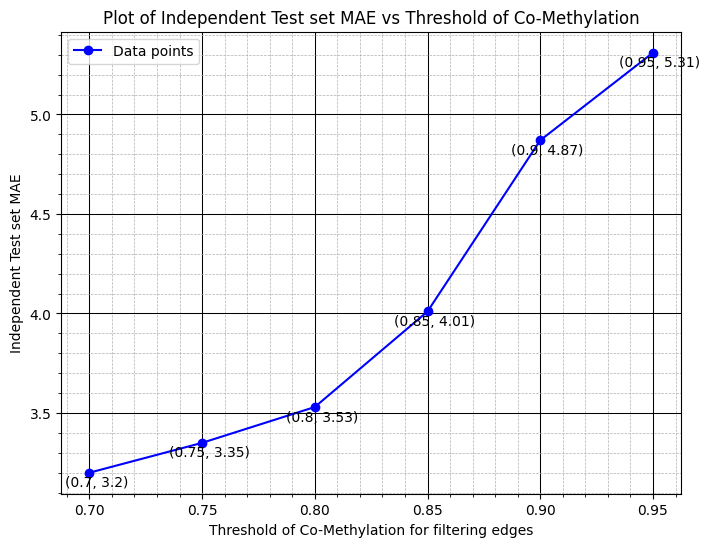

In [76]:
import matplotlib.pyplot as plt

# Data
x = [0.95, 0.90, 0.85, 0.80, 0.75, 0.70]
y = [5.31, 4.87, 4.01, 3.53, 3.35, 3.20]

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Plot of Independent Test set MAE vs Threshold of Co-Methylation')
plt.xlabel('Threshold of Co-Methylation for filtering edges')
plt.ylabel('Independent Test set MAE')

# Adding a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding minor ticks
plt.minorticks_on()

# # Customizing the grid lines
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.grid(which='major', linestyle='-', linewidth='0.75', color='black')

# # Adding more yticks
# y_ticks = [i/10 for i in range(30, 54, 1)]
# plt.yticks(y_ticks)

# Labeling points
for i, txt in enumerate(y):
    plt.annotate(f'({x[i]}, {y[i]})', (x[i], y[i]), textcoords="offset points", xytext=(5,-10), ha='center')

# Reversing the x-axis
# plt.gca().invert_xaxis()

# Adding a legend
plt.legend(['Data points'])
plt.savefig('MAEvsThreshold.png')
# Display the plot
plt.show()